In [1]:
using PyCall
using PyPlot

  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31

Use "Dict{AbstractString,Any}(a=>b for (a,b) in c)" instead.
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in bytestring(::String) at ./deprecated.jl:50
 in include_from_node1(::String) at ./loading.jl:426 (repeats 2 times)
 in eval(::Module, ::Any) at ./boot.jl:234
 in require(::Symbol) at ./loading.jl:357
 in include_string(::String, ::String) at ./loading.jl:380
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /Users/ryandwyer/.julia/v0.5/IJulia/src/execute_request.jl:183
 in eventloop(::ZMQ.Socket) at /Users/ryandwyer/.julia/v0.5/IJulia/src/IJulia.jl:143
 in (::IJulia.##24#30)() at ./task.jl:315
while loading /Users/ryandwyer/.julia/v0.5/PyCall/src/../deps/deps.jl, in expression starting on line 

LoadError: LoadError: LoadError: InitError: MethodError: no method matching |(::UInt32, ::Void)
Closest candidates are:
  |(::Any, ::Any, !Matched::Any, !Matched::Any...)
  |{T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}}(::T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8}, !Matched::T<:Union{Int128,Int16,Int32,Int64,Int8,UInt128,UInt16,UInt32,UInt64,UInt8})
  |(::Integer)
  ...
during initialization of module PyCall
while loading /Users/ryandwyer/.julia/v0.5/PyCall/src/PyCall.jl, in expression starting on line 541
while loading In[1], in expression starting on line 1

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in utf8(::SubString{String}) at ./deprecated.jl:50
 in _collect(::Array{SubString{String},1}, ::Base.Generator{Array{SubString{String},1},Base.#utf8}, ::Base.EltypeUnknown, ::Base.HasShape) at ./array.jl:251
 in #error_content#12(::Symbol, ::String, ::Function, ::LoadError, ::Array{Ptr{Void},1}) at /Users/ryandwyer/.julia/v0.5/IJulia/src/execute_request.jl:75
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /Users/ryandwyer/.julia/v0.5/IJulia/src/execute_request.jl:238
 in eventloop(::ZMQ.Socket) at /Users/ryandwyer/.julia/v0.5/IJulia/src/IJulia.jl:143
 in (::IJulia.##24#30)() at ./task.jl:315
while loading /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in utf8(::SubString{String}) at ./deprecated.jl:50
 in collect_to!(::Array{String,1}, ::Base.Generator{Array{SubString{String},1},Base.#utf8}, ::Int64, ::Int64) at ./array.jl:27

In [33]:
omega0 = 1.0*2*pi
Q = 300.0
omega_r = omega0 / Q
A   = [0.0 1.0
    -omega0^2 -omega_r]

2×2 Array{Float64,2}:
   0.0      1.0     
 -39.4784  -0.020944

In [34]:
svd(A)

(
2×2 Array{Float64,2}:
 -1.34468e-5  1.0       
  1.0         1.34468e-5,

[39.4784,1.0],
2×2 Array{Float64,2}:
 -1.0          -0.000530857
 -0.000530857   1.0        )

In [35]:
eigv, eigval= eig(A)

(Complex{Float64}[-0.010472+6.28318im,-0.010472-6.28318im],
2×2 Array{Complex{Float64},2}:
 -0.000261961-0.157177im  -0.000261961+0.157177im
      0.98757+0.0im            0.98757-0.0im     )

In [36]:
expm(A*10.0)

2×2 Array{Float64,2}:
 0.900577     -1.2508e-5
 0.000493798   0.900577 

In [37]:
expm(A*2.0)

2×2 Array{Float64,2}:
 0.979274    -2.72021e-6
 0.00010739   0.979274  

In [38]:
eigval * Diagonal(exp(eigv*10.0)) * inv(eigval)

2×2 Array{Complex{Float64},2}:
 0.900577+2.1684e-19im   -1.2508e-5+0.0im
      0.000493798+0.0im    0.900577+0.0im

In [39]:
x = collect(-10:0.01:10)

2001-element Array{Float64,1}:
 -10.0 
  -9.99
  -9.98
  -9.97
  -9.96
  -9.95
  -9.94
  -9.93
  -9.92
  -9.91
  -9.9 
  -9.89
  -9.88
   ⋮   
   9.89
   9.9 
   9.91
   9.92
   9.93
   9.94
   9.95
   9.96
   9.97
   9.98
   9.99
  10.0 

In [40]:
k1d(x, sigma=1.0) = x^2 * exp(-x^2/(2*sigma^2))

k1d (generic function with 2 methods)

In [43]:
x2 = -5:0.01:5
y2 = k1d.(x2, 1.0);

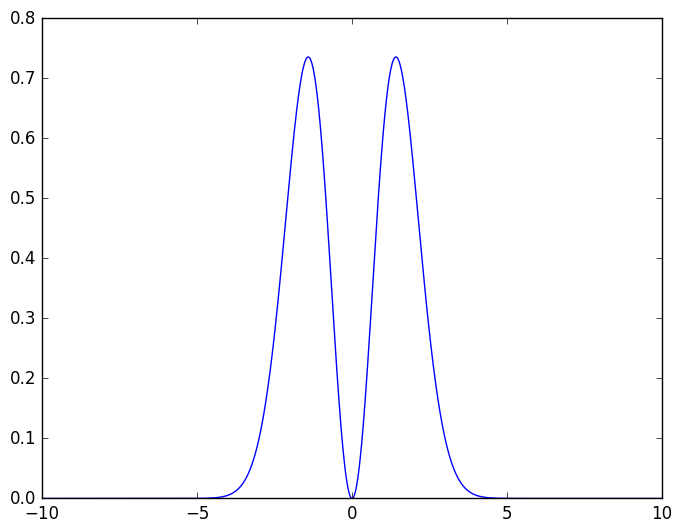

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x326729bd0>

In [42]:
plot(x, y)

In [96]:
x3 = -5:1.25:5
h = y3 = k1d.(x3, 1.0)

9-element Array{Float64,1}:
 9.31663e-5
 0.0124288 
 0.274606  
 0.715365  
 0.0       
 0.715365  
 0.274606  
 0.0124288 
 9.31663e-5

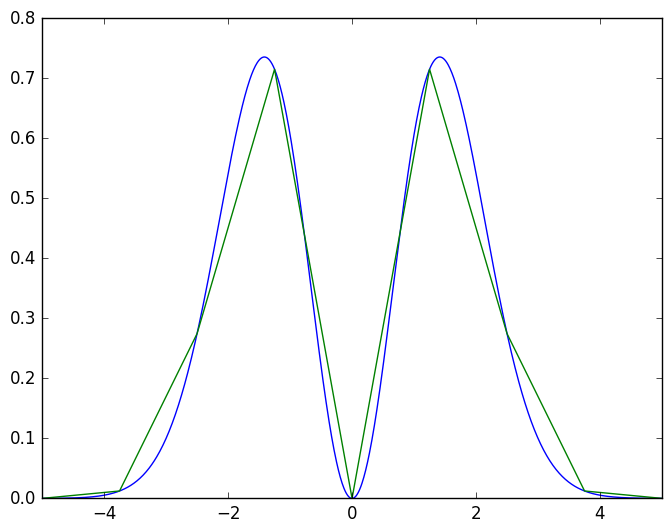

(-5,5)

In [55]:
plot(x2, y2)
plot(x3, y3)
xlim(-5, 5)

In [81]:
norm(loc, sigma) = (x) -> exp(-(x-loc)^2/(2*sigma^2))

norm (generic function with 1 method)

In [91]:
actualval(x) = 0.75*norm(3.5, 2.0)(x) + 1.25*norm(-1.0, 1.0)(x) + 0.5*norm(-6.0, 0.75)(x) + norm(8.0, 0.25)(x)

actualval (generic function with 1 method)

In [94]:
d = actualval.(x)

2001-element Array{Float64,1}:
 3.33014e-7
 3.57522e-7
 3.83765e-7
 4.11861e-7
 4.41937e-7
 4.74124e-7
 5.08565e-7
 5.45412e-7
 5.84824e-7
 6.26973e-7
 6.7204e-7 
 7.20219e-7
 7.71715e-7
 ⋮         
 0.00455425
 0.00448202
 0.00441082
 0.00434065
 0.00427148
 0.00420331
 0.00413613
 0.00406992
 0.00400467
 0.00394036
 0.003877  
 0.00381455

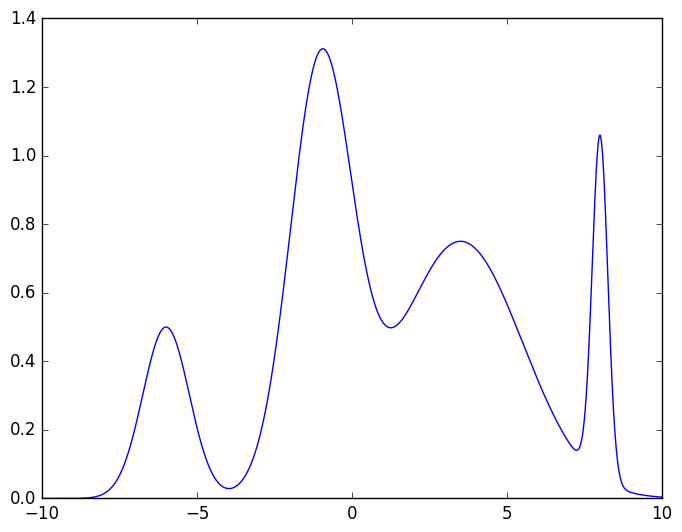

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32cbabb90>

In [95]:
plot(x, d)

In [100]:
?conv

 [inlined code] from ./error.jl:26
 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 [inlined code] from ./strings/io.jl:51
 in symbol(::String, ::Vararg{String,N}) at ./deprecated.jl:30
 in helpcode(::String) at /Users/ryandwyer/.julia/v0.5/IJulia/src/execute_request.jl:134
 in execute_request_0x535c5df2(::ZMQ.Socket, ::IJulia.Msg) at /Users/ryandwyer/.julia/v0.5/IJulia/src/execute_request.jl:173
 [inlined code] from ./dict.jl:780
 in eventloop(::ZMQ.Socket) at /Users/ryandwyer/.julia/v0.5/IJulia/src/IJulia.jl:142
 in (::IJulia.##24#30)() at ./task.jl:308
while loading /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl, in expression starting on line 31


search: conv conv2 convert deconv code_native @code_native conj cond const conj!



```
conv(u,v)
```

Convolution of two vectors. Uses FFT algorithm.


  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/ryandwyer/.julia/v0.5/IJulia/src/kernel.jl:31


In [103]:
h = y = k1d.(x, 1.0);

In [104]:
y = conv(d, h)

4001-element Array{Float64,1}:
  2.15584e-14
  7.18613e-15
  1.43723e-14
  2.15584e-14
  1.43723e-14
  1.43723e-14
  0.0        
  0.0        
  0.0        
  0.0        
  0.0        
 -7.18613e-15
  1.43723e-14
  ⋮          
  1.8818e-14 
  1.01125e-14
  2.05338e-14
  3.13691e-15
  3.00709e-15
  1.50389e-14
  2.58673e-14
  2.08601e-14
 -7.07385e-15
  1.02423e-14
  1.81548e-14
  1.48424e-15

In [112]:
Ni = round(Int, (length(h)-1) / 2)
Nf = Ni + length(x)-1

3000

In [114]:
y_same = y[Ni:Nf]

2001-element Array{Float64,1}:
  3.04267
  3.10693
  3.1723 
  3.23881
  3.30646
  3.37528
  3.44527
  3.51645
  3.58883
  3.66243
  3.73725
  3.81332
  3.89064
  ⋮      
 43.6576 
 43.3165 
 42.9726 
 42.6261 
 42.2772 
 41.9258 
 41.5722 
 41.2165 
 40.8587 
 40.499  
 40.1375 
 39.7744 

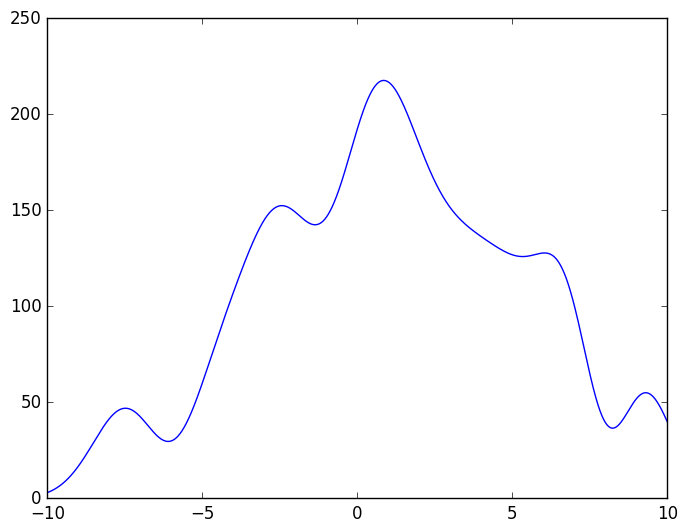

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32e1e6c50>

In [124]:
function h2mat(h, M1, M2)
    Hn = length(h)
    H = zeros((M1, M2))
    for i = 1:M1
        if i < Hn
            H[i, 1:i] = h[1:i]
        elseif (i >= Hn) && (i < M2)
            H[i, i-Hn+1: i] = h[1:end]
        else
            istart = i - M2 + 1
            H[i, i-Hn+1:end] = h[istart:end]
        end
    end
    
    return H
end

h2mat (generic function with 1 method)

In [130]:
mat = h2mat(h, length(y), length(d))

4001×2001 Array{Float64,2}:
 1.92875e-20  0.0          0.0         …  0.0          0.0        
 1.92875e-20  2.12723e-20  0.0            0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20  …  0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20  …  0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 1.92875e-20  2.12723e-20  2.3459e-20     0.0          0.0        
 ⋮                                     ⋱               ⋮          
 0.0          0.0          0.0    

/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/Users/ryandwyer/anaconda/lib/python2.7/site-packages/matplotlib/axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


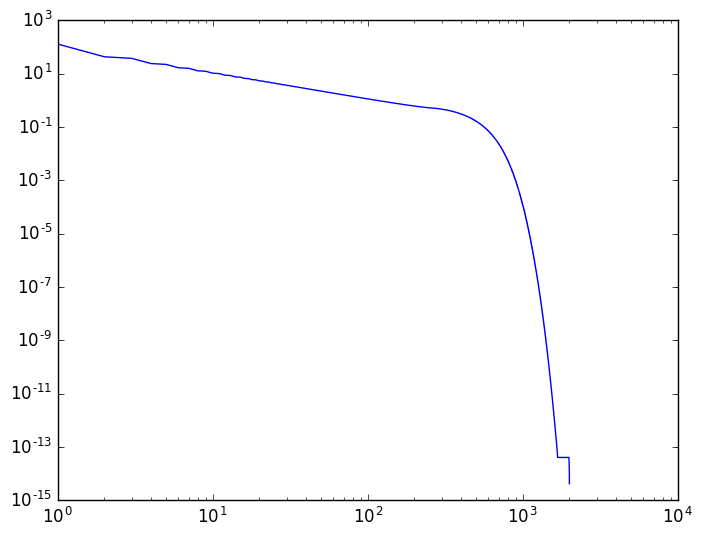

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32d4e9e10>

In [136]:
loglog(d)

In [140]:
indmax(cumsum(d) / sum(d) .> 0.99)

533

In [171]:
u * diagm(d) * v' - mat

4001×2001 Array{Float64,2}:
  9.17266e-16  -1.43185e-13   1.01032e-13  …  -3.05312e-17  -1.27655e-17
  9.17266e-16   2.15833e-15  -5.68319e-15     -1.24429e-16  -1.00679e-16
  9.17266e-16  -4.15678e-15   1.89096e-14     -3.36379e-16  -2.98964e-16
  9.17266e-16  -1.99824e-14   1.5187e-14       6.77409e-16   6.49612e-16
  9.17266e-16   3.23624e-14  -2.4633e-14       1.6674e-16    1.71742e-16
  9.17266e-16   7.82981e-15   7.95759e-15  …  -2.16665e-16  -1.86924e-16
  9.17266e-16   2.90182e-14   6.07641e-15     -3.78083e-17  -1.95805e-17
  9.17266e-16  -9.41309e-15  -3.03629e-15     -8.89401e-16  -8.1643e-16 
  9.17266e-16  -5.79838e-14   1.67102e-14     -5.10162e-17  -3.18602e-17
  9.17266e-16  -2.24715e-14   1.74076e-15     -1.12639e-16  -8.9655e-17 
  9.17266e-16  -5.17623e-15  -1.3277e-14   …   2.66308e-16   2.65016e-16
  9.17266e-16  -2.75374e-16  -1.52803e-14      3.18022e-16   3.13278e-16
  9.17266e-16   6.18895e-14  -3.84558e-14     -4.70937e-16  -4.2488e-16 
  ⋮                    

In [154]:
vecnorm(mat)

515.7528591046735

In [157]:
u

4001×2001 Array{Float64,2}:
  8.73326e-16   1.22011e-16   5.46982e-16  …  -0.00694467   -0.000404812
 -2.88693e-15  -1.8057e-15   -7.40849e-16      0.0381865    -0.0188544  
  1.0213e-15    5.70959e-16  -7.45952e-16     -0.0259158     0.0743509  
  3.68637e-15   2.17313e-15   1.00112e-15      0.0102664    -0.0263002  
 -2.5289e-15   -1.49425e-15   1.06075e-16      0.00953357   -0.0238139  
 -9.82434e-16  -6.04236e-16  -1.08566e-16  …   0.170415     -0.0730921  
  1.67995e-15   9.82173e-16   2.66391e-16     -0.0740612    -0.109801   
 -1.08075e-15  -6.71869e-16  -7.23611e-17      0.0180988    -0.0141311  
 -1.33049e-15  -7.8866e-16   -2.95662e-16      0.00313677    0.0210941  
  2.79165e-16   1.51637e-16   5.63993e-17     -0.135412      0.105466   
  1.00238e-15   6.12101e-16   2.33246e-16  …  -0.111557      0.0453102  
 -1.12488e-15  -6.66648e-16  -1.46225e-16     -0.0604842    -0.06818    
  5.23678e-16   3.4981e-16    2.20546e-17     -0.0512043    -0.0804023  
  ⋮                    

In [162]:
mat_larger = mat*1e15

4001×2001 Array{Float64,2}:
 1.92875e-5  0.0         0.0        …  0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  0.0           0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5  …  0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5  …  0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 1.92875e-5  2.12723e-5  2.3459e-5     0.0        0.0         0.0       
 ⋮                     

In [176]:
x10 = (-10:0.1:10)

-10.0:0.1:10.0

In [200]:
h10 = k1d.(x10, 1.0)

201-element Array{Float64,1}:
 1.92875e-20
 5.11292e-20
 1.34162e-19
 3.48465e-19
 8.95886e-19
 2.27986e-18
 5.74282e-18
 1.43186e-17
 3.53373e-17
 8.63217e-17
 2.08717e-16
 4.99513e-16
 1.18327e-15
 ⋮          
 4.99513e-16
 2.08717e-16
 8.63217e-17
 3.53373e-17
 1.43186e-17
 5.74282e-18
 2.27986e-18
 8.95886e-19
 3.48465e-19
 1.34162e-19
 5.11292e-20
 1.92875e-20

In [201]:
d10 = actualval.(x10);

In [202]:
y10 = conv(h10, d10);

In [203]:
H10 = h2mat(h10, length(y10), length(d10));

In [205]:
u, d, v = svd(H10);

In [221]:
d2 = [x > eps(Float64)*100 ? x : 0.0 for x in d]

201-element Array{Any,1}:
 49.3578  
 13.0447  
  4.35607 
  3.80035 
  2.4341  
  2.26356 
  1.7034  
  1.6217  
  1.31723 
  1.26963 
  1.0791  
  1.04813 
  0.918401
  ⋮       
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     
  0.0     

In [223]:
u * diagm(d) * v'

401×201 Array{Float64,2}:
 -2.96658e-16  -5.1176e-16    1.86126e-15  …  -1.69228e-16  -8.14333e-17
 -2.96658e-16  -8.67973e-16  -7.52928e-16     -3.92279e-16  -2.0717e-16 
 -2.96658e-16   1.71402e-15  -2.91512e-15     -4.78406e-16  -2.55739e-16
 -2.96658e-16  -1.7284e-15    5.72784e-16      6.12278e-16   3.59063e-16
 -2.96658e-16   1.47228e-15  -1.1348e-15      -4.10386e-16  -2.17409e-16
 -2.96658e-16  -1.59354e-16  -1.66177e-16  …   6.04783e-16   3.54815e-16
 -2.96658e-16   3.44279e-16   5.46999e-16     -3.10424e-16  -1.61047e-16
 -2.96658e-16   1.42724e-15  -1.22842e-15      1.73845e-15   9.93876e-16
 -2.96658e-16   1.79748e-15  -1.47882e-15     -4.63657e-16  -2.47444e-16
 -2.96658e-16  -1.2727e-15    6.68731e-16     -1.78646e-16  -8.67671e-17
 -2.96658e-16  -1.35964e-15   1.09924e-15  …  -6.54791e-17  -2.2981e-17 
 -2.96658e-16  -1.08155e-15   8.22571e-16     -3.6921e-16   -1.94214e-16
 -2.96658e-16   1.19222e-15  -3.64548e-16     -1.00193e-16  -4.25556e-17
  ⋮                      

In [226]:
Ht = h2mat([0.1, 0.3, 0.5, 0.3, 0.1], 100, 96)

100×96 Array{Float64,2}:
 0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.1  0.3  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.1  0.3  0.5  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.1  0.3  0.5  0.3  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.1  0.3  0.5  0.3  0.1  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.1  0.3  0.5  0.3  0.1  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.1  0.3  0.5  0.3  0.1  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.1  0.3  0.5  0.3  0.1     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.1  0.3  0.5  0.3     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.1  0.3  0.5     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.3  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [228]:
ut, dt, vt = svd(Ht);

In [232]:
ut * diagm(dt) * vt' 

100×96 Array{Float64,2}:
  0.1          -1.46871e-17  -9.92783e-17  …  -8.55121e-17  -1.93006e-18
  0.1           0.3          -3.53954e-17     -3.68187e-17  -1.05582e-17
  0.1           0.3           0.5             -6.16134e-17  -1.04124e-17
  0.1           0.3           0.5             -5.26196e-17  -3.40397e-17
  0.1           0.3           0.5             -2.0487e-17   -2.95244e-17
  1.53686e-16   0.1           0.3          …   6.42018e-17   2.70322e-17
  1.30416e-16   6.30561e-17   0.1             -9.62653e-17  -3.38421e-17
  1.67551e-16   3.40184e-16   6.98478e-16     -4.17787e-17  -4.51299e-17
  1.70839e-16   4.07103e-16   6.6836e-16      -1.06685e-16  -3.41388e-17
  1.25704e-16   4.99864e-16   4.19249e-16     -1.33555e-16  -5.69844e-17
  7.50207e-17   4.58782e-16   2.24611e-16  …   1.43321e-17   1.7358e-17 
 -8.81973e-19   2.37875e-16   2.49339e-17     -1.04253e-16  -1.0467e-17 
  3.48935e-18  -3.78221e-17  -8.58786e-17      1.43682e-17   3.45928e-18
  ⋮                       

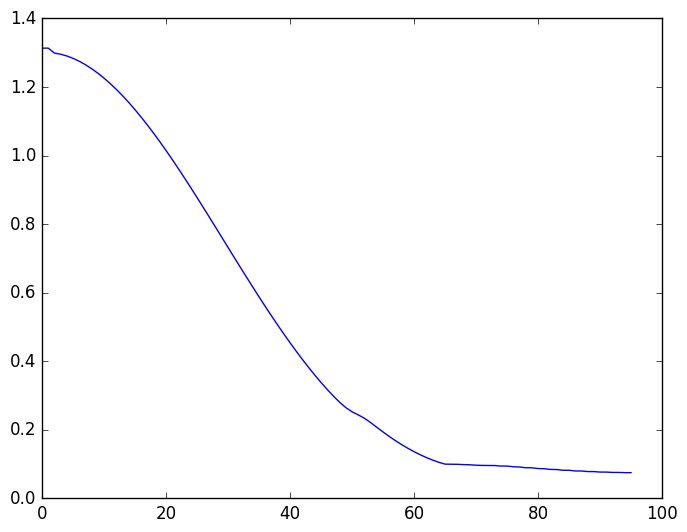

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x33bcc4890>

In [233]:
plot(dt)

In [236]:
cumsum(dt) / sum(dt)

96-element Array{Float64,1}:
 0.0273545
 0.0547089
 0.081761 
 0.108746 
 0.135624 
 0.162358 
 0.188915 
 0.215262 
 0.241366 
 0.267198 
 0.292728 
 0.317927 
 0.342767 
 ⋮        
 0.982194 
 0.983905 
 0.985574 
 0.987241 
 0.988874 
 0.990504 
 0.992107 
 0.993707 
 0.995288 
 0.996867 
 0.998434 
 1.0      

In [239]:
Nmax = 96 - 7;

In [243]:
out = ut[1:end, 1:Nmax] * Diagonal(dt[1:Nmax]) * vt'[1:Nmax, 1:end]

100×96 Array{Float64,2}:
  0.0999971    1.21966e-6  -1.45939e-6  …  -3.46685e-7   9.75867e-7
  0.100001     0.299998     8.68805e-7      6.01263e-7  -6.41894e-8
  0.0999935    0.300002     0.499997       -4.97855e-7   2.21579e-6
  0.1          0.300006     0.499998       -2.23178e-6  -1.09489e-6
  0.100007     0.299993     0.500005        2.26148e-6  -1.44381e-6
 -2.79992e-6   0.100001     0.299999    …  -2.03047e-7   9.47693e-7
  5.63965e-6  -8.14678e-6   0.100005        2.81386e-6  -9.52073e-7
 -2.22493e-5   2.37679e-5  -1.63137e-5     -7.87965e-6   5.09006e-6
  4.42246e-5  -3.40746e-5   2.78544e-5      1.07235e-5  -1.22199e-5
 -5.32634e-5   2.61714e-5  -2.83735e-5     -7.52104e-6   1.7222e-5 
  3.43149e-5   2.20231e-6   1.16239e-5  …  -1.74696e-6  -1.46201e-5
  1.18892e-5  -3.89245e-5   1.79131e-5      1.26967e-5   2.79144e-6
 -6.55284e-5   6.32033e-5  -4.58034e-5     -1.89653e-5   1.40192e-5
  ⋮                                     ⋱                ⋮         
  2.79144e-6   1.26967e